In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import normalize
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df_train=pd.read_csv('D:\\Bharadwaj\\AL MI\\hacker_earth\\airplane_accident\\train.csv')
df_test=pd.read_csv('D:\\Bharadwaj\\AL MI\\hacker_earth\\airplane_accident\\test.csv')
df_sample=pd.read_csv('D:\\Bharadwaj\\AL MI\\hacker_earth\\airplane_accident\\sample_submission.csv')
df_train.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054


In [3]:
severity_types=[]
severity_types.append(df_train['Severity'].unique())
print(severity_types)

[array(['Minor_Damage_And_Injuries', 'Significant_Damage_And_Fatalities',
       'Significant_Damage_And_Serious_Injuries',
       'Highly_Fatal_And_Damaging'], dtype=object)]


In [4]:
list1=[]
list1.append(df_train['Severity'].value_counts())
list1

[Highly_Fatal_And_Damaging                  3049
 Significant_Damage_And_Serious_Injuries    2729
 Minor_Damage_And_Injuries                  2527
 Significant_Damage_And_Fatalities          1695
 Name: Severity, dtype: int64]

In [5]:
df_train.columns

Index(['Severity', 'Safety_Score', 'Days_Since_Inspection',
       'Total_Safety_Complaints', 'Control_Metric', 'Turbulence_In_gforces',
       'Cabin_Temperature', 'Accident_Type_Code', 'Max_Elevation',
       'Violations', 'Adverse_Weather_Metric', 'Accident_ID'],
      dtype='object')

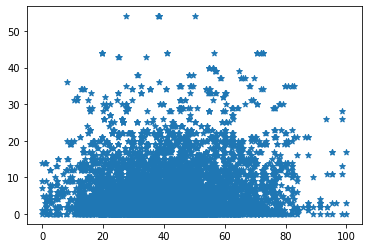

In [6]:
plt.scatter(df_train['Safety_Score'],df_train['Total_Safety_Complaints'],marker='*')

                         Safety_Score  Days_Since_Inspection  \
Safety_Score                 1.000000              -0.685386   
Days_Since_Inspection       -0.685386               1.000000   
Total_Safety_Complaints      0.057726              -0.032055   
Control_Metric               0.000564              -0.011963   
Turbulence_In_gforces        0.019603              -0.001564   
Cabin_Temperature            0.032747              -0.039140   
Accident_Type_Code           0.173930              -0.024718   
Max_Elevation                0.004451               0.000183   
Violations                   0.041735              -0.016724   
Adverse_Weather_Metric      -0.107925               0.040804   
Accident_ID                 -0.001334               0.000582   

                         Total_Safety_Complaints  Control_Metric  \
Safety_Score                            0.057726        0.000564   
Days_Since_Inspection                  -0.032055       -0.011963   
Total_Safety_Complaints    

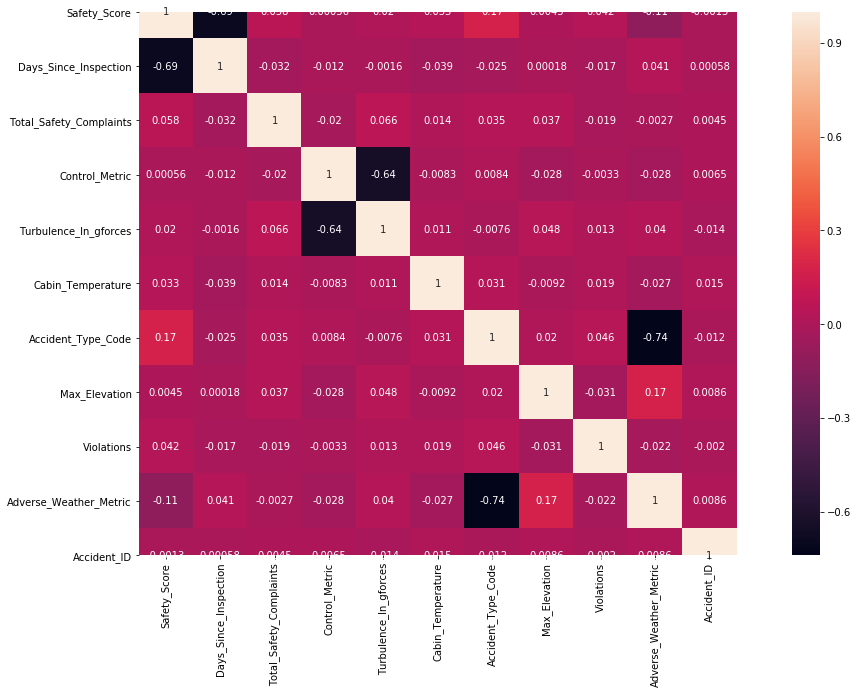

In [7]:
fig, ax = plt.subplots(figsize=(20,10)) 
df_train_correlation=df_train.corr()
print(df_train_correlation)
sns.heatmap(df_train_correlation,annot=True,square=True,ax=ax)

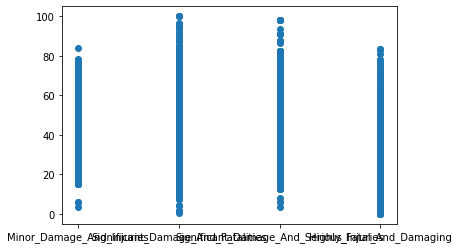

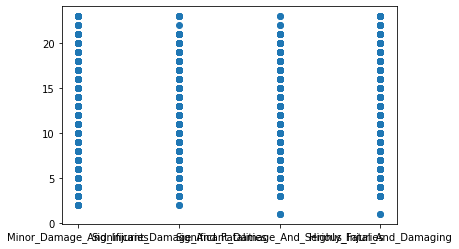

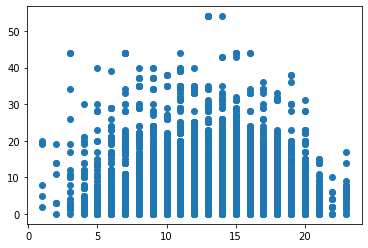

In [8]:
plt.scatter(df_train['Severity'],df_train['Safety_Score'])
plt.show()
plt.scatter(df_train['Severity'],df_train['Days_Since_Inspection'])
plt.show()
plt.scatter(df_train['Days_Since_Inspection'],df_train['Total_Safety_Complaints'])
plt.show()

In [9]:
"""Severity_dummies=pd.get_dummies(df_train['Severity'],drop_first=True)
df_train=pd.concat([df_train,Severity_dummies],axis='columns')"""

"Severity_dummies=pd.get_dummies(df_train['Severity'],drop_first=True)\ndf_train=pd.concat([df_train,Severity_dummies],axis='columns')"

In [10]:
print(df_train)

                                     Severity  Safety_Score  \
0                   Minor_Damage_And_Injuries     49.223744   
1                   Minor_Damage_And_Injuries     62.465753   
2           Significant_Damage_And_Fatalities     63.059361   
3     Significant_Damage_And_Serious_Injuries     48.082192   
4           Significant_Damage_And_Fatalities     26.484018   
...                                       ...           ...   
9995  Significant_Damage_And_Serious_Injuries     56.118721   
9996                Highly_Fatal_And_Damaging     40.365297   
9997  Significant_Damage_And_Serious_Injuries     27.853881   
9998                Minor_Damage_And_Injuries     56.210046   
9999                Highly_Fatal_And_Damaging     50.000000   

      Days_Since_Inspection  Total_Safety_Complaints  Control_Metric  \
0                        14                       22       71.285324   
1                        10                       27       72.288058   
2                        13

In [11]:
df_train[['Safety_Score','Control_Metric','Max_Elevation','Cabin_Temperature']]=normalize(df_train[['Safety_Score','Control_Metric','Max_Elevation','Cabin_Temperature']])

In [32]:
X_train=df_train.loc[:,df_train.columns!='Severity']
y_train=df_train.loc[:,'Severity']
X_test_test=df_test.iloc[:,:]

In [19]:
X_train_train,X_train_test,y_train_train,y_train_test=train_test_split(X_train,y_train,random_state=0)

In [22]:
model1=RandomForestClassifier(n_estimators=1000)
model1.fit(X_train_train,y_train_train)
y_train_pred=model1.predict(X_train_test)
print(accuracy_score(y_train_test,y_train_pred))

0.7488


In [23]:
model2=AdaBoostClassifier(base_estimator=model1)
model2.fit(X_train_train,y_train_train)
y_train_pred=model2.predict(X_train_test)
print(accuracy_score(y_train_test,y_train_pred))

0.7496


In [28]:
model2.fit(X_train)

['Highly_Fatal_And_Damaging' 'Significant_Damage_And_Serious_Injuries'
 'Minor_Damage_And_Injuries' ... 'Highly_Fatal_And_Damaging'
 'Significant_Damage_And_Fatalities'
 'Significant_Damage_And_Serious_Injuries']


In [40]:
model2.fit(X_train,y_train)
y_pred=model2.predict(X_test_test)

In [48]:
submission=pd.DataFrame({'Accident_ID': X_test_test['Accident_ID'],'Severity':y_pred})
submission.to_csv('submission.csv')

2500
